<a href="https://colab.research.google.com/github/paulguru/colab/blob/main/Week1_Linear_Regression_tobecomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Week 1 Assignment 1 - AI For ALL: Linear Regression Application:**

In this comprehensive Python code exercise, a Linear Regression Model is used to predict house prices. The code load data housing file named kc_house_data.csv from Kaggle (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

You are requested to complete the code where you see #complete the code here
----------------------------------- only
Also it is expected that you fix any error you encounter while running the code.

In [56]:
#importing the needed Python Libraries to handle data and use Machine Learning Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from google.colab import drive

In [57]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
# Load the dataset (replace 'housing_data.csv' with your actual file)
data = pd.read_csv("/content/drive/My Drive/Data/kc_house_data.csv")

Mean Squared Error: 44951491944.93202
R-squared: 0.7026559760834244


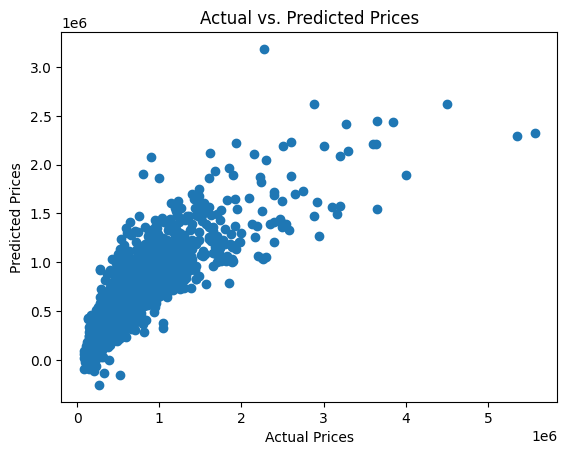

Bias: 3047.68209489504
Variance: 176695312.2633179


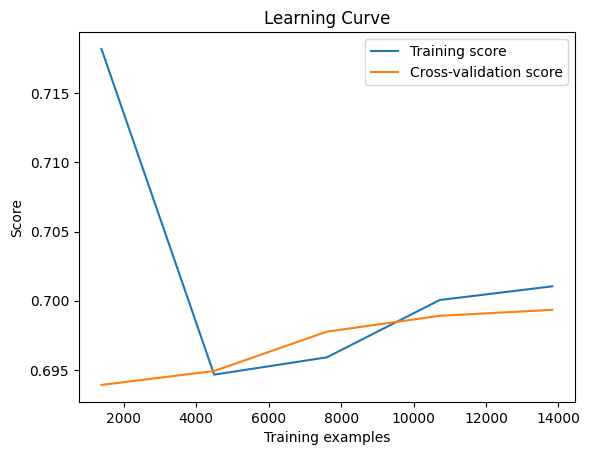

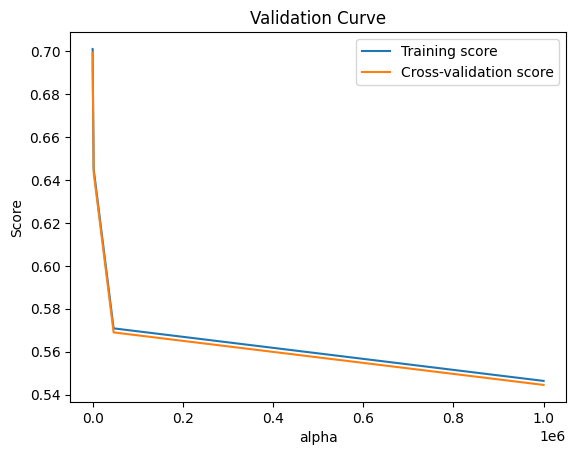

Ridge Regression MSE: 44952676012.808235
Ridge Regression R-squared: 0.7026481437403438
Lasso Regression MSE: 44951541265.98479
Lasso Regression R-squared: 0.702655649835737


In [60]:
# Convert 'date' column to datetime objects and extract features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Drop the original 'date' column and 'id' column
data = data.drop(['date', 'id'], axis=1)

# Split the data into features (X) and target variable (y)
X = data.drop("price", axis=1)
y = data["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the model's performance
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

# Bias-Variance Trade-Off
# Create a function to calculate bias and variance
def bias_variance_decomposition(model, X_train, y_train, X_test, y_test, num_iterations=100):
    bias = []
    variance = []
    for _ in range(num_iterations):
        X_train_bootstrap, _, y_train_bootstrap, _ = train_test_split(X_train, y_train, test_size=0.5)
        model.fit(X_train_bootstrap, y_train_bootstrap)
        y_pred_bootstrap = model.predict(X_test)
        bias.append((y_test - y_pred_bootstrap).mean())
        variance.append((y_pred_bootstrap - y_pred).var())
    return np.mean(bias), np.mean(variance)

bias, variance = bias_variance_decomposition(model, X_train, y_train, X_test, y_test)
print("Bias:", bias)
print("Variance:", variance)

# Overfitting and Underfitting
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()

# Validation Curve
# Instead of LinearRegression, use a model with an 'alpha' parameter, such as Ridge or Lasso
# For example, using Ridge:
param_range = np.logspace(-6, 6, 10)
ridge_model = Ridge() # Initialize a Ridge model

train_scores, test_scores = validation_curve(
    ridge_model,  # Use the Ridge model instead of LinearRegression
    X_train,
    y_train,
    param_name="alpha",
    param_range=param_range,
    cv=5
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_scores_mean, label="Training score")
plt.plot(param_range, test_scores_mean, label="Cross-validation score")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Validation Curve")
plt.show()

# Regularization
# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R-squared:", r2_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)
print("Lasso Regression R-squared:", r2_lasso)

In [61]:
# Create new data for prediction with the same features as the training data
new_data = pd.DataFrame({
    "bedrooms": [3],
    "bathrooms": [2.5],
    "sqft_living": [2600],
    "sqft_lot": [5000],  # Replace with an appropriate value
    "floors": [2.0],
    "waterfront": [0],
    "view": [0],
    "condition": [3],
    "grade": [7],
    "sqft_above": [1650],
    "sqft_basement": [950],
    "yr_built": [1975],
    "yr_renovated": [0],
    "zipcode": [98103],
    "lat": [47.6788],
    "long": [-122.165],
    "sqft_living15": [2550], # Replace with an appropriate value
    "sqft_lot15": [5100],  # Replace with an appropriate value
    "year": [2023],          # If you want to predict for a specific year
    "month": [12],           # If you want to predict for a specific month
    "day": [31]            # If you want to predict for a specific day
}, index=[0])  # Ensure the DataFrame has an index


predicted_price = model.predict(new_data) [0]
print("Predicted Price:", predicted_price)

Predicted Price: 882887.051227428
